In [1]:
from ase import Atoms
import numpy as np
import nglview as nv
from fireballpy import Fireball
import pandas as pd
d=1.09
atoms = Atoms(  symbols=['H','C','H'],
              positions=[(-d, 0.0, 0.0),
                         (0.0, 0.0, 0.0),
                         (d, 0.0, 0.0)])
atoms.calc = Fireball(fdata='HCSi',
                      charges_method='mulliken_dipole_preserving')
etot = atoms.get_potential_energy()
print(f'E = {etot:.2f} eV')    

E = -175.53 eV


In [2]:
from fireballpy.orbitals import Fireball_Orbitals
orb = Fireball_Orbitals(fbobj=atoms.calc) 
ini = np.array([-3, 0, 0])  
fin = np.array([3, 0, 0])    
num_puntos = 200
phi,rho = orb.phi1D(ini,fin,num_puntos)

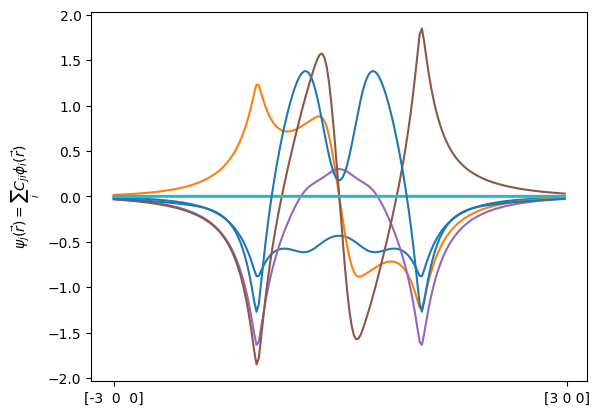

In [4]:
import matplotlib.pyplot as plt
X = np.arange(num_puntos) 
for i in range(len(phi)):
  plt.plot(X, phi[i], '-')
plt.xticks([0, num_puntos], [f'{ini}', f'{fin}']) 
plt.ylabel(r'$\psi_j(\vec r) = \sum_i C_{ji} \phi_{i}(\vec r)$')
plt.show()
#plt.savefig('figure.png')

In [5]:
ETOT = atoms.get_potential_energy()
fermi_energy = atoms.calc.get_fermi_level()
eigenvectors=atoms.calc.get_eigenvectors()
eigenvalues=atoms.calc.eigenvalues[0]
norb=len(eigenvalues)

fermi_level=0
for e in eigenvalues:
    if e < fermi_energy:
        fermi_level += 1
#    print(e ,fermi_energy,fermi_level)

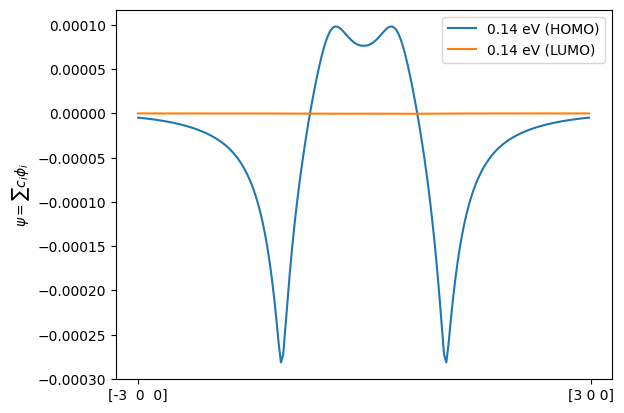

In [6]:
plt.plot(X, phi[fermi_level-1], '-',label=f"{eigenvalues[fermi_level-1]:.2f} eV (HOMO)")
plt.plot(X, phi[fermi_level], '-',label=f"{eigenvalues[fermi_level]:.2f} eV (LUMO)")
plt.xticks([0, num_puntos], [f'{ini}', f'{fin}']) 
plt.ylabel(r'$\psi = \sum c_i \phi_i $')
plt.legend()
plt.show()

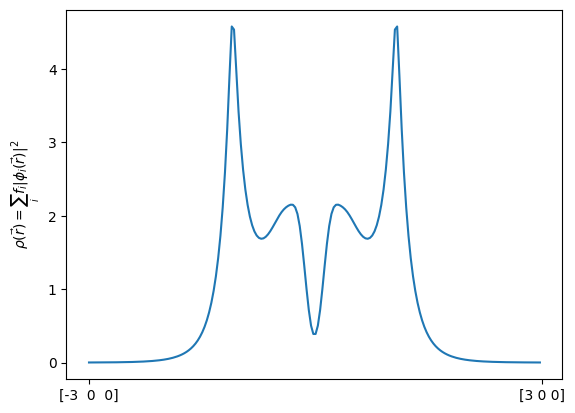

In [7]:
plt.plot(X, rho, '-')
plt.xticks([0, num_puntos], [f'{ini}', f'{fin}']) 
plt.ylabel(r'$\rho(\vec r) = \sum_i f_{i} |\phi_{i}(\vec r)|^2$')
plt.show() 